# **Bellabeat Case Study with Python**
#####  
#### [GitHub repository](https://github.com/Mohsen-Baghaee/Bellabeat-Case-Study-with-Python.git)
#### Data set on [Kaggle](https://www.kaggle.com/arashnic/fitbit)



In [11]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://bit.ly/36PRG1P", width=700, height=600)

# **How Can Bellabeat Play It Smart?** 

## **About The ompany**
## 
#### Bellabeat is a high-tech company that manufactures health-focused smart products. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women. 

## **Company's Goals**
## 
#### Urška Sršen, Bellabeat’s cofounder and Chief Creative Officer, knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. She has asked the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, she would like recommendations for how these trends can inform Bellabeat marketing strategy.  

## **Analysis Questions**
## 

### 1.	What are some trends in smart device usage? 
### 2.	How could these trends apply to Bellabeat customers? 
### 3.	How could these trends help influence Bellabeat marketing strategy? 


## **Purpose of the Analysis**
### 
#### Providing recommendations based on analysis of trends in smart device usage which can inform Bellabeat marketing strategy. 

#### **Loading packages and changing options**


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import pyodbc

pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_columns', 500)


# Extending the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#### **Importing Data from csv files**

In [47]:
dailyActivity = pd.read_csv('D:\CaseStudy2\Data\dailyActivity_merged.csv')
dailySleep = pd.read_csv('D:\CaseStudy2\Data\sleepDay_merged.csv')
weight = pd.read_csv('D:\CaseStudy2\Data\weightLogInfo_merged.csv')

#### **Importing Data from Microsoft SQL server**

In [48]:
server = 'localhost\SQLEXPRESS'
database = 'FitBit'
connection = pyodbc.connect('DRIVER={SQL Server};SERVER=' + server + ';DATABAE=' + database + ';Trusted_Connection=yes')

sql = """

SELECT * FROM FitBit..heartrate_seconds_merged

"""
Heartrate = pd.read_sql(sql,connection)
Heartrate.head()

,Id,Time,Value
0,6962181067,4/12/2016 1:59:55 AM,71
1,6962181067,4/12/2016 2:00:00 AM,70
2,6962181067,4/12/2016 2:00:10 AM,71
3,6962181067,4/12/2016 2:00:25 AM,71
4,6962181067,4/12/2016 2:00:30 AM,70


In [49]:
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [50]:
dailySleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [51]:
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


#### **Importing data from csv files and merging them**
##### **Chaning the date time format**

In [52]:
HCalories = pd.read_csv('D:\CaseStudy2\Data\Hourly\hourlyCalories.csv')
HIntensities = pd.read_csv('D:\CaseStudy2\Data\Hourly\hourlyIntensities.csv')
HSteps = pd.read_csv('D:\CaseStudy2\Data\Hourly\hourlySteps.csv')

In [53]:
Hourly_Calorie_Intensities_Steps = pd.merge(pd.merge(HCalories, HIntensities), HSteps)

Hourly_Calorie_Intensities_Steps['ActivityHour'] =  pd.to_datetime(Hourly_Calorie_Intensities_Steps.ActivityHour, format='%m/%d/%Y %I:%M:%S %p')

Hourly_Calorie_Intensities_Steps.head()

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,2016-04-12 00:00:00,81,20,0.333333,373
1,1503960366,2016-04-12 01:00:00,61,8,0.133333,160
2,1503960366,2016-04-12 02:00:00,59,7,0.116667,151
3,1503960366,2016-04-12 03:00:00,47,0,0.000000,0
4,1503960366,2016-04-12 04:00:00,48,0,0.000000,0


In [54]:
MCalories = pd.read_csv('D:\CaseStudy2\Data\Minutely\minuteCalories.csv')
MIntensities = pd.read_csv('D:\CaseStudy2\Data\Minutely\minuteIntensities.csv')
MMETs = pd.read_csv('D:\CaseStudy2\Data\Minutely\minuteMETs.csv')
MSteps = pd.read_csv('D:\CaseStudy2\Data\Minutely\minuteSteps.csv')

In [55]:
Minutely_Calorie_Intensities_METs_Steps = pd.merge(pd.merge(MCalories, MIntensities), pd.merge(MMETs, MSteps))

Minutely_Calorie_Intensities_METs_Steps['ActivityMinute'] =  pd.to_datetime(Minutely_Calorie_Intensities_METs_Steps.ActivityMinute, format='%m/%d/%Y %I:%M:%S %p')

Minutely_Calorie_Intensities_METs_Steps.head()

,Id,ActivityMinute,Calories,Intensity,METs,Steps
0,1503960366,2016-04-12 00:00:00,0.7865,0,10,0
1,1503960366,2016-04-12 00:01:00,0.7865,0,10,0
2,1503960366,2016-04-12 00:02:00,0.7865,0,10,0
3,1503960366,2016-04-12 00:03:00,0.7865,0,10,0
4,1503960366,2016-04-12 00:04:00,0.7865,0,10,0


#### **Checking and fixing data types** 

In [56]:
Heartrate.dtypes

Id       object
Time     object
Value    object
dtype: object

In [57]:
dailyActivity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [58]:
Heartrate['Id'] = Heartrate.Id.astype('int64')
Heartrate['Value'] = Heartrate.Value.astype('int64')
Heartrate['Time'] = pd.to_datetime(Heartrate.Time, format='%m/%d/%Y %I:%M:%S %p')

dailyActivity['ActivityDate'] = pd.to_datetime(dailyActivity.ActivityDate)
dailySleep['SleepDay'] = pd.to_datetime(dailySleep.SleepDay, format='%m/%d/%Y %I:%M:%S %p')
weight['Date'] = pd.to_datetime(weight.Date, format='%m/%d/%Y %I:%M:%S %p')

#### **Looking for Null values**

In [59]:
dailyActivity.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

#### **Number of participants**

In [60]:
len(dailyActivity.Id.unique()) 

33

#### **Time period**

In [61]:
dailyActivity.ActivityDate.max() - dailyActivity.ActivityDate.min()

Timedelta('30 days 00:00:00')

#### **Summary of records of each participant**

In [62]:
summary = dailyActivity.groupby('Id').describe()
summary

TotalSteps                                                        \
                count          mean          std     min       25%      50%   
Id                                                                            
1503960366       31.0  12116.741935  3052.484201     0.0  10573.00  12207.0   
1624580081       31.0   5743.903226  6177.048612  1510.0   2614.50   4026.0   
1644430081       30.0   7282.966667  4325.478825  1223.0   3603.25   6683.5   
1844505072       31.0   2580.064516  2712.836854     0.0      0.00   2237.0   
1927972279       31.0    916.129032  1205.269064     0.0      0.00    152.0   
2022484408       31.0  11370.645161  2806.994710  3292.0  10193.00  11548.0   
2026352035       31.0   5566.870968  2977.834815   254.0   3412.50   5528.0   
2320127002       31.0   4716.870968  2254.614642   772.0   3406.50   5057.0   
2347167796       18.0   9519.666667  4682.093700    42.0   6984.25   9781.0   
2873212765       31.0   7555.774194  1514.471585  2524.0   7369.00   7762.0   
3372868164       20.0   6861.650000  1842.451321  3077.0   5446.50   7150.5   
3977333714       30.0  10984.566667  3134.141610   746.0   9266.25  11604.0   
4020332650       31.0   2267.225806  3369.790624     0.0      0.00     62.0   
4057192912        4.0   3838.000000  2691.665655     0.0   2988.00   4689.0   
4319703577       31.0   7268.838710  3467.055707    17.0   4622.00   8221.0   
4388161847       31.0  10813.935484  3373.130533  3369.0   9829.00  10243.0   
4445114986       31.0   4796.548387  1937.070689   768.0   3592.50   4514.0   
4558609924       31.0   7685.129032  2356.961289  3428.0   5854.00   7833.0   
4702921684       31.0   8572.064516  3451.848277     0.0   6910.00   8614.0   
5553957443       31.0   8612.580645  5074.505038   655.0   4180.50   9769.0   
5577150313       30.0   8304.433333  3846.985821     0.0   5592.00   8232.5   
6117666160       28.0   7046.714286  4887.698154     0.0   3393.50   7332.0   
6290855005       29.0   5649.551724  2857.612310     0.0   5565.00   6277.0   
6775888955       26.0   2519.692308  3027.802540     0.0      0.00   1624.5   
6962181067       31.0   9794.806452  3941.753387  1551.0   6315.00  10433.0   
7007744171       26.0  11323.423077  5306.477598     0.0   8067.50  13291.0   
7086361926       31.0   9371.774194  3857.093316     0.0   8574.50  10091.0   
8053475328       31.0  14763.290323  5440.962055  1170.0  12443.50  15108.0   
8253242879       19.0   6482.157895  3141.325132     0.0   4387.00   6466.0   
8378563200       31.0   8717.709677  3929.338521  2132.0   5886.50   8382.0   
8583815059       31.0   7198.516129  3401.729275     0.0   4763.00   6174.0   
8792009665       29.0   1853.724138  2327.360214     0.0      0.00   1320.0   
8877689391       31.0  16040.032258  5821.315135  4790.0  11150.50  15118.0   

                              TotalDistance                             \
                 75%      max         count       mean       std   min   
Id                                                                       
1503960366  13912.50  18134.0          31.0   7.809677  1.984180  0.00   
1624580081   6752.00  36019.0          31.0   3.914839  4.796242  0.98   
1644430081   9886.00  18213.0          30.0   5.295333  3.143581  0.89   
1844505072   4561.00   8054.0          31.0   1.706129  1.793759  0.00   
1927972279   1730.50   3790.0          31.0   0.634516  0.833966  0.00   
2022484408  12876.00  18387.0          31.0   8.084193  2.049099  2.31   
2026352035   7120.00  12357.0          31.0   3.454839  1.848067  0.16   
2320127002   6212.50  10725.0          31.0   3.187742  1.543623  0.52   
2347167796  10436.75  22244.0          18.0   6.355556  3.177554  0.03   
2873212765   8296.00   9685.0          31.0   5.101613  1.030916  1.70   
3372868164   8220.00   9715.0          20.0   4.707000  1.277869  2.10   
3977333714  13196.50  16520.0          30.0   7.517000  2.158668  0.50   
4020332650   4432.50  11728.0          31.0   1.626129  

#### **Number of records for each participant**

In [63]:
summary.loc[:, ('TotalSteps', 'count')]

Id
1503960366    31.0
1624580081    31.0
1644430081    30.0
1844505072    31.0
1927972279    31.0
2022484408    31.0
2026352035    31.0
2320127002    31.0
2347167796    18.0
2873212765    31.0
3372868164    20.0
3977333714    30.0
4020332650    31.0
4057192912     4.0
4319703577    31.0
4388161847    31.0
4445114986    31.0
4558609924    31.0
4702921684    31.0
5553957443    31.0
5577150313    30.0
6117666160    28.0
6290855005    29.0
6775888955    26.0
6962181067    31.0
7007744171    26.0
7086361926    31.0
8053475328    31.0
8253242879    19.0
8378563200    31.0
8583815059    31.0
8792009665    29.0
8877689391    31.0
Name: (TotalSteps, count), dtype: float64

#### One participant has just 4 records which is not suitable for analysis, However the most of them have 31 records

#### **How many participants have less than 31 record?**

In [64]:
summary[summary.TotalSteps['count'] < 31].TotalSteps['count'].value_counts().sum()

12

#### **Sum of total steps taken by each participant during the time period**

In [65]:
 dailyActivity.groupby('Id').TotalSteps.sum()

Id
1503960366    375619
1624580081    178061
1644430081    218489
1844505072     79982
1927972279     28400
2022484408    352490
2026352035    172573
2320127002    146223
2347167796    171354
2873212765    234229
3372868164    137233
3977333714    329537
4020332650     70284
4057192912     15352
4319703577    225334
4388161847    335232
4445114986    148693
4558609924    238239
4702921684    265734
5553957443    266990
5577150313    249133
6117666160    197308
6290855005    163837
6775888955     65512
6962181067    303639
7007744171    294409
7086361926    290525
8053475328    457662
8253242879    123161
8378563200    270249
8583815059    223154
8792009665     53758
8877689391    497241
Name: TotalSteps, dtype: int64

### **Number of sleep records per participant**
#### 24 out of 33 participants have sleep records

In [66]:
len(dailySleep.Id.unique())

24

### **sleep records for each unique participant**

#### Many participants have few sleep records 

In [67]:
dailySleep.groupby('Id').TotalSleepRecords.count()

Id
1503960366    25
1644430081     4
1844505072     3
1927972279     5
2026352035    28
2320127002     1
2347167796    15
3977333714    28
4020332650     8
4319703577    26
4388161847    24
4445114986    28
4558609924     5
4702921684    28
5553957443    31
5577150313    26
6117666160    18
6775888955     3
6962181067    31
7007744171     2
7086361926    24
8053475328     3
8378563200    32
8792009665    15
Name: TotalSleepRecords, dtype: int64

#### **Sleep records fewer than 10**
#####  More than a quarter of participants have less than 10 sleep records

In [68]:
dd = dailySleep.groupby('Id').TotalSleepRecords.count()
dd = dd.to_frame()
dd.loc[dd['TotalSleepRecords'] <=10]

,TotalSleepRecords
Id,
1644430081,4
1844505072,3
1927972279,5
2320127002,1
4020332650,8
4558609924,5
6775888955,3
7007744171,2
8053475328,3


### **Number of weight records**
##### Not enough data to analyze

In [69]:
len(weight.Id.unique())

8

### **Summary of Participants' Records of Total Steps, Total Distance, and Sedentary Minutes vs. Calories**

Text(0.5, 1.01, "Summary of Participants' Records of Total Steps, Total Distance, and Sedentary Minutes vs. Calories")

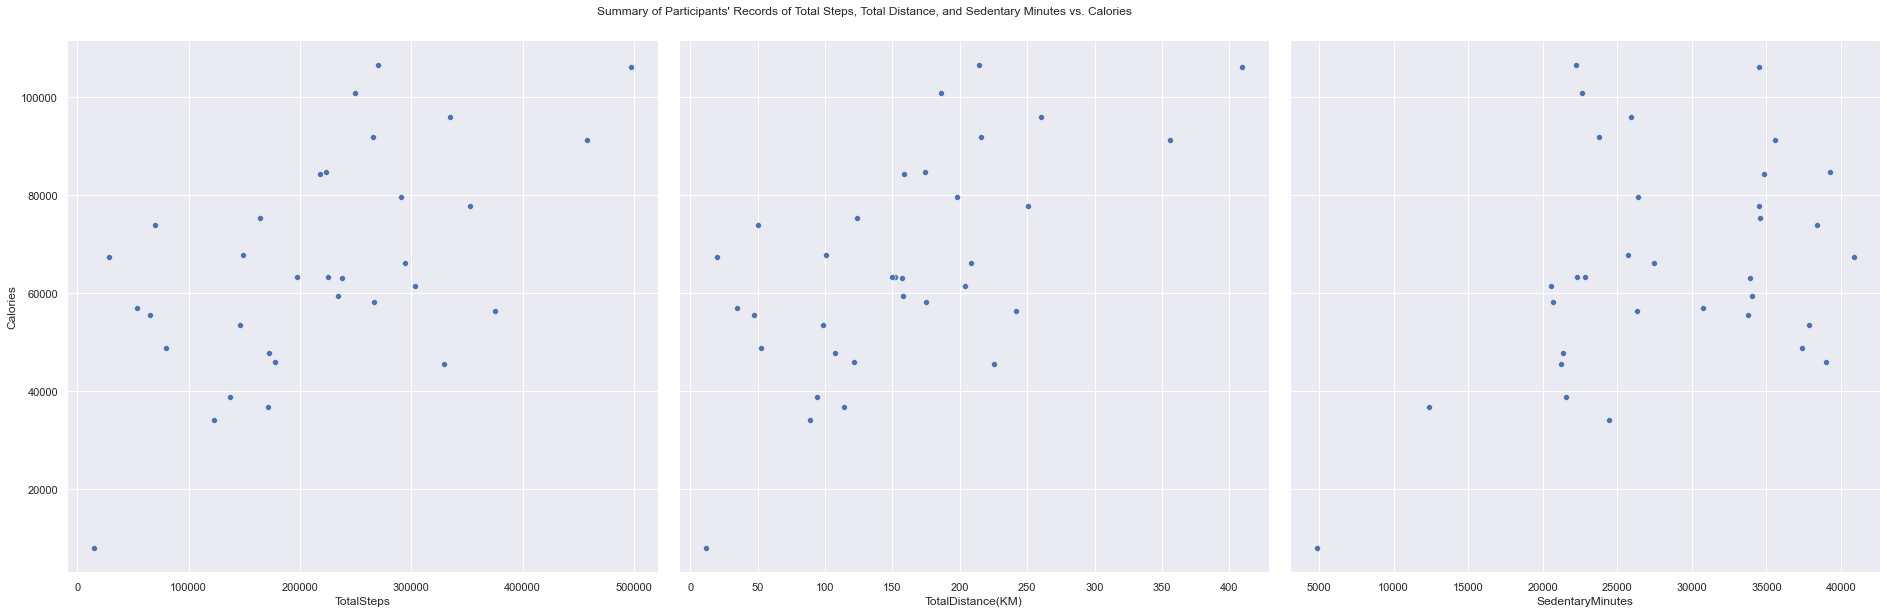

In [70]:

summary = dailyActivity.groupby('Id')
summarySum = summary.sum()
summarySum.rename(columns={'TotalDistance': 'TotalDistance(KM)'}, inplace=True)

sns.set_style('darkgrid')
ssum = sns.pairplot(summarySum, x_vars=['TotalSteps', 'TotalDistance(KM)', 'SedentaryMinutes'], y_vars='Calories', diag_kind = None)
ssum.fig.set_size_inches(30,10)
ssum.fig.suptitle("Summary of Participants' Records of Total Steps, Total Distance, and Sedentary Minutes vs. Calories", y=1.01)

##### From the summary diagrams above we can identify outliers. Also the total range of steps taken and the total distance, which is directly related to calorie burning and the range of sedentary minutes.

### **Sedentary Minutes vs. Calories**

Text(0.5, 1.0, 'Sedentary Minutes vs. Calories')

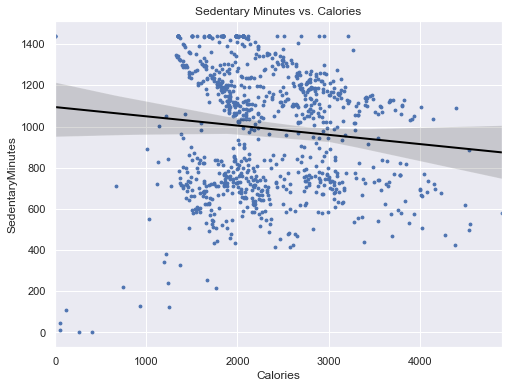

In [71]:
#plt.figure(figsize=(10,6))
plt.rcParams['figure.figsize'] =(8,6)
sns.set_theme(color_codes=True)
cs = sns.regplot(x="Calories", y="SedentaryMinutes", data=dailyActivity, ci=100, scatter_kws={'s':8, 'alpha': 1},
           line_kws={'lw':2, 'color':'black'})
cs.set_title('Sedentary Minutes vs. Calories')

##### Based on the graph above, overall, the fewer sedentary minutes result in more calories burn, although many records between 2,000 and 3,000 calories and 600 to 1300 minutes show that it was also possible to spend 1000 to 1300 minutes sedentary and at the same time burn as much calories as other records which only had 600 to 800 minutes.

### **Total Steps vs Calories**

Text(0.5, 1.0, 'Total Steps vs Calories')

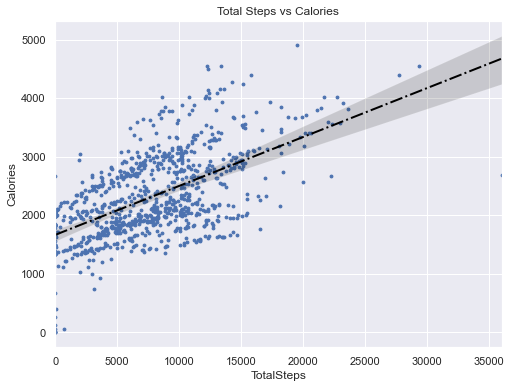

In [72]:
sns.set_theme(color_codes=True)
plt.gca().set(xlim=(0, 36019))
ts = sns.regplot(x="TotalSteps", y="Calories", data=dailyActivity, ci=100, scatter_kws={'s':8, 'alpha': 1},
           line_kws={'lw':2, 'color':'black', 'linestyle':'-.'});
ts.set_title('Total Steps vs Calories')

##### Well, it's obvious that more steps lead to more calories burn.

### **Average of Heartrate and Intensity in 24 hours**

<AxesSubplot:title={'center':'Average of Heartrate and Intensity in 24 hours'}, xlabel='Time(H)', ylabel='Intensity - Heartrate'>

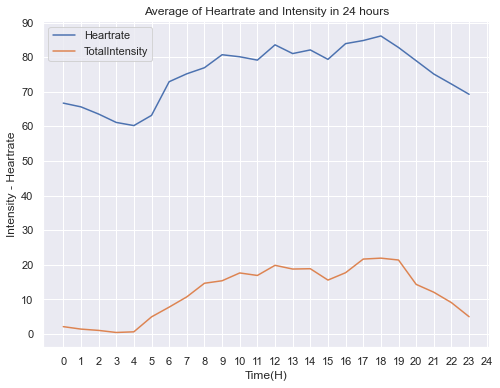

In [73]:
Heartrate['Time(H)'] = Heartrate.Time.dt.hour
H = Heartrate.groupby('Time(H)').Value.mean()
H = H.to_frame()

Hourly_Calorie_Intensities_Steps['Time(H)'] = Hourly_Calorie_Intensities_Steps.ActivityHour.dt.hour
I = Hourly_Calorie_Intensities_Steps.groupby('Time(H)').TotalIntensity.mean()
I = I.to_frame()

HI =  pd.merge(H, I, left_on='Time(H)', right_on='Time(H)')
HI.rename(columns={'Value':'Heartrate'}, inplace=True)

HI.plot(ylabel='Intensity - Heartrate', title='Average of Heartrate and Intensity in 24 hours', xticks=range(0,25), yticks=(0,10,20,30,40,50,60,70,80,90))

##### The graph above is very interesting to me, showing an almost  correlation between heart rate and overall intensity. The peak of both line charts was between 5 p.m. and 7 p.m. and the minority between 1 a.m. and 4 a.m.

### **Total Minutes Asleep vs. Total Minutes in Bed**

Text(0.5, 1.0, 'Total Minutes Asleep vs. Total Minutes in Bed')

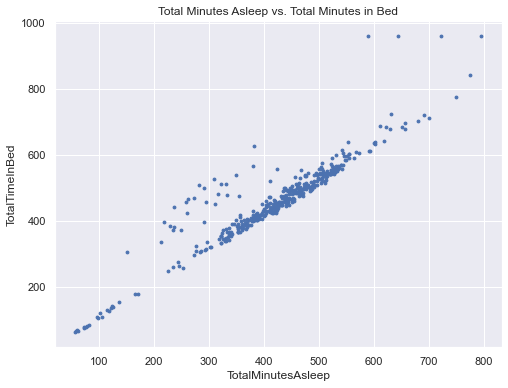

In [74]:
sns.set_theme(color_codes=True)
TT = sns.regplot(x="TotalMinutesAsleep", y="TotalTimeInBed", data=dailySleep, ci=100, scatter_kws={'s':8, 'alpha': 1}, fit_reg=False);
TT.set_title('Total Minutes Asleep vs. Total Minutes in Bed')

##### An almost linear correlation can be seen between bedtime and sleeping time. However, it can be seen that participants who spent more time in bed also slept fewer minutes than expected.

### **Sedentary Minutes vs. Total Minutes Asleep**

Text(0.5, 1.0, 'Sedentary Minutes vs. Total Minutes Asleep')

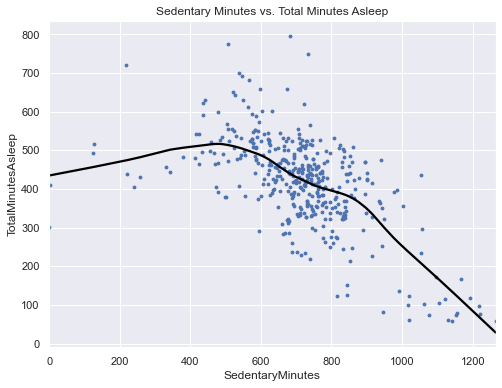

In [75]:
dt = dailySleep.iloc[:,[0,1,3]]
ds = dailyActivity.loc[:,['Id', 'ActivityDate', 'SedentaryMinutes']]
dtds = pd.merge(dt, ds, how= 'left', left_on=['Id','SleepDay'], right_on=['Id', 'ActivityDate'])

sns.set_theme(color_codes=True)
sta = sns.regplot(x="SedentaryMinutes", y="TotalMinutesAsleep", data=dtds, ci=100, scatter_kws={'s':8, 'alpha': 1},
                 line_kws={'color':'black'}, lowess=True);
sta.set_title('Sedentary Minutes vs. Total Minutes Asleep')

##### It seems that the more Sedantary Minutes leads to less Minutes Asleep. So the participants should try to reduce the Sedantary minutes in order to have enough sleep.

### **Total Intensity(Average) vs. Time**

<AxesSubplot:title={'center':'Total Intensity(Average) vs. Time'}, xlabel='Hour', ylabel='Intensity'>

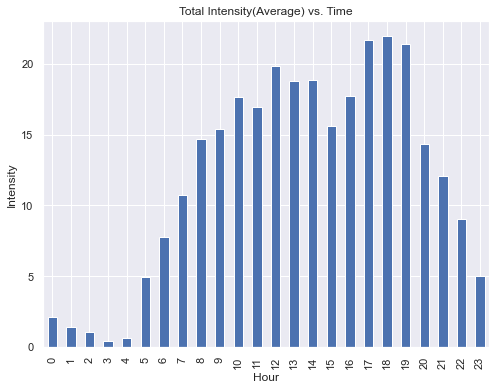

In [76]:
Hourly_Calorie_Intensities_Steps['Hour'] = Hourly_Calorie_Intensities_Steps.ActivityHour.dt.hour
Hourly_Calorie_Intensities_Steps.groupby('Hour').TotalIntensity.mean().plot.bar(ylabel='Intensity', title='Total Intensity(Average) vs. Time')

#### Apparently, between 10am and 12pm and 5pm and 8pm were suitable times for participants to be more active. 

## **Conclusion and recommendation for the Bellabeat marketing strategy.**
### 
##### While I felt the available data from this case study was insufficient to arrive at a clearer course of action for their business, I see some potential in the following contexts for the company to further develop its strategy effectively in the future .
### 
##### - Participants can be notified across different platforms in the app to schedule their activity start and end time more efficiently, e.g. being fairly active from 10am to 12pm and very active between 5pm and 8pm.
### 
##### - Various alerts across platforms can be set to remind participants that they have spent more sedantary minutes than recommended in relation to their sleep pattern.
### 
##### - Participants can receive recommendations from the app to do more activities to sleep well and receive enough sleep on days when they have spent more time in bed than expected.
### 
##### - When participants receive a detailed summary of their activities over the past two weeks, they can also see their records and improve their habits to experience a healthier lifestyle, and their new records can be used again after changes by data analysts to find other potential ways to improve the overall system.



In [21]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.ibb.co/6rTNTYY/walk.jpg", width=800, height=400)

##### I hope you enjoyed my analysis and gained some useful information from it.
##### 
##### I tried using different python syntax in different libraries like Pandas, Matplotlib and Seaborn. I also worked with some of the data in Microsoft SQL Server first and then imported it into the Jupyter notebook here.  I hope that in some cases my code can also be interesting for others.
##### 
##### Thank you for your attention to my case study (Bellabeat). I would appreciate your comments and suggestions.